Selamat datang! Ini adalah kumpulan data publik e-niaga Brasil mengenai pesanan yang dilakukan di Olist Store. Kumpulan data tersebut memiliki informasi 100 ribu pesanan dari tahun 2016 hingga 2018 yang dilakukan di beberapa pasar di Brasil. Fitur-fiturnya memungkinkan melihat pesanan dari berbagai dimensi: mulai dari status pesanan, harga, pembayaran dan kinerja pengiriman hingga lokasi pelanggan, atribut produk, dan akhirnya ulasan yang ditulis oleh pelanggan. Kami juga merilis kumpulan data geolokasi yang menghubungkan kode pos Brasil dengan koordinat lintang/bujur.

# Proyek ahir dicoding : analisa data Olist Store

Point pertanyaan pada analisa ini adalah 3 pertanyaan yaitu:

    1. Produk Apa yang Paling Banyak dan Paling Sedikit Terjual
    
    2. Berapa rating yang diberikan pelanggan? Bisakah kamu tampilkan rating tertinggi hingga terendah? berapa mayoritas rating dari skala 1-5
    
    3. Jika di urutkan menurut kota di brazil,maka di kota mana pelanggan paling banyak memesan?

# 1.data wrangling

kita akan mulai proyek analisis data ini dengan menjalankan proses data wrangling terlebih dahulu. Proses ini memiliki tujuan antara lain

    mengumpulkan seluruh data yang dibutuhkan;
    menilai kualitas dari data yang telah dikumpulkan; dan
    membersihkan data tersebut sehingga siap untuk dianalisis.

Untuk memulai pengerjaan proyek ini, kita perlu memanggil semua library yang dibutuhkan. Berikut merupakan kode untuk melakukannya.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. DATA WRANGLING

# 1.1 Gathering Data

1.1.1 Memuat Data costumer dan id number nya
(D0NE)

In [73]:
data_customer_id = pd.read_csv("/home/elfander/Proyek Ahir/data/olist_customers_dataset.csv")
data_customer_id.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


1.1.2. Memuat geolokasi customer (done)

In [34]:
geolokasi_customer = pd.read_csv("/home/elfander/Proyek Ahir/data/olist_geolocation_dataset.csv")
geolokasi_customer.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


1.1.3. melihat daftar list order berdasarkan product id dan seller id (done)

In [37]:
list_order_berdasarkan_product_id = pd.read_csv("/home/elfander/Proyek Ahir/data/olist_order_items_dataset.csv")
list_order_berdasarkan_product_id.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


1.1.4. melihat data pembayaran customer (done)

In [38]:
data_pembayaran = pd.read_csv("/home/elfander/Proyek Ahir/data/olist_order_payments_dataset.csv")
data_pembayaran.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


1.1.5. melihat list order review dataset serta score product nya (done)

In [39]:
list_order_review_score = pd.read_csv("/home/elfander/Proyek Ahir/data/olist_order_reviews_dataset.csv")
list_order_review_score.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


1.1.6. melihat data pengiriman customer (done)

In [40]:
data_pengiriman = pd.read_csv("/home/elfander/Proyek Ahir/data/olist_orders_dataset.csv")
data_pengiriman.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


1.1.7. melihat daftar produk yg customer pesen (done)

In [43]:
daftar_nama_produk = pd.read_csv("/home/elfander/Proyek Ahir/data/olist_products_dataset.csv")
daftar_nama_produk.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


1.1.8. melihat daerah seller (done)

In [45]:
daerah_seller = pd.read_csv("/home/elfander/Proyek Ahir/data/olist_sellers_dataset.csv")
daerah_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


1.1.9. melihat daftar product yg customer pesen dalam bhasa inggris

In [47]:
produk_inggris = pd.read_csv("/home/elfander/Proyek Ahir/data/product_category_name_translation.csv")
produk_inggris.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# 1.2 Assessing Data

Sekarang kita masuk ke tahap kedua dalam proses data wrangling yaitu assessing data. pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

1.2.1. menilai data dari data_customer_id

In [83]:
#data_customer_id.info()

#untuk pastikan tidak ada missing value
#data_customer_id.isna().sum()

#Untuk pastikan tidak ada data duplikasi
#print("Jumlah duplikasi: ", data_customer_id.duplicated().sum())

#untuk melihat data statistic
#data_customer_id.describe()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

pada data_customer_id bisa dilihat diatas semua angka sesuai yg artinya tidak ada missing value & tidak ada angka duplikasi

1.2.2 MENILAI DATA DARI geolokasi_customer

In [85]:
#geolokasi_customer.info()

#untuk pastikan tidak ada missing value
#geolokasi_customer.isna().sum()

#Untuk pastikan tidak ada data duplikasi
#print("Jumlah duplikasi: ", geolokasi_customer.duplicated().sum())

#untuk melihat data statistic
#geolokasi_customer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


terdapat duplikasi sebanyak 261831 pada geolokasi_customer yang akan di bersihkan pada tahap cleaning data. tidak ada missing value

1.2.3 MENILAI DATA DARI list_order_berdasarkan_product_id

In [95]:
list_order_berdasarkan_product_id.info()

#untuk pastikan tidak ada missing value
#list_order_berdasarkan_product_id.isna().sum()

#Untuk pastikan tidak ada data duplikasi
#print("Jumlah duplikasi: ", list_order_berdasarkan_product_id.duplicated().sum())

#untuk melihat data statistic
#list_order_berdasarkan_product_id.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


pada list_order_berdasarkan_product_id bisa dilihat diatas semua angka sesuai yg artinya tidak ada missing value & tidak ada angka duplikasi

1.2.4 MENILAI DATA DARI data_pembayaran

In [103]:
data_pembayaran.info()

#untuk pastikan tidak ada missing value
#data_pembayaran.isna().sum()

#Untuk pastikan tidak ada data duplikasi
#print("Jumlah duplikasi: ", data_pembayaran.duplicated().sum())

#untuk melihat data statistic
#data_pembayaran.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


pada data_pembayaran bisa dilihat diatas semua angka sesuai yg artinya tidak ada missing value & tidak ada angka duplikasi

1.2.5 MENILAI DATA DARI list_order_review_score

In [165]:
#list_order_review_score.info()

#untuk pastikan tidak ada missing value
list_order_review_score.isna().sum()

#Untuk pastikan tidak ada data duplikasi
#print("Jumlah duplikasi: ", list_order_review_score.duplicated().sum())

#untuk melihat data statistic
#list_order_review_score.describe()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

pada list_order_review_score bisa dilihat terdapat missing value

review_comment_title       87656

review_comment_message     58247

yang akan kita bersihkan pada cleaning data nanti

1.2.6 MENILAI DATA DARI data_pengiriman

In [125]:
data_pengiriman.info()

#untuk pastikan tidak ada missing value
#data_pengiriman.isna().sum()

#Untuk pastikan tidak ada data duplikasi
#print("Jumlah duplikasi: ", data_pengiriman.duplicated().sum())

#untuk melihat data statistic
#data_pengiriman.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


pada data_pengiriman bisa dilihat terdapat missing value

order_approved_at                 160

order_delivered_carrier_date     1783

order_delivered_customer_date    2965

yang akan kita bersihkan pada cleaning data nanti

1.2.7 MENILAI DATA DARI daftar_nama_produk

In [196]:
#daftar_nama_produk.info()

#untuk pastikan tidak ada missing value
daftar_nama_produk.isna().sum()

#Untuk pastikan tidak ada data duplikasi
#print("Jumlah duplikasi: ", daftar_nama_produk.duplicated().sum())

#untuk melihat data statistic
#daftar_nama_produk.describe()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

pada daftar_nama_produk bisa dilihat terdapat missing value


product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2

yg akan kita bersihkan pada tahap cleaning nanti

1.2.8 MENILAI DATA DARI daerah_seller

In [155]:
daerah_seller.info()

#untuk pastikan tidak ada missing value
#daerah_seller.isna().sum()

#Untuk pastikan tidak ada data duplikasi
#print("Jumlah duplikasi: ", daerah_seller.duplicated().sum())

#untuk melihat data statistic
#daerah_seller.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


pada daerah_seller bisa dilihat diatas semua angka sesuai yg artinya tidak ada missing value & tidak ada angka duplikasi

1.2.9 MENILAI DATA DARI produk_inggris

In [152]:
produk_inggris.info()

#untuk pastikan tidak ada missing value
#produk_inggris.isna().sum()

#Untuk pastikan tidak ada data duplikasi
#print("Jumlah duplikasi: ", produk_inggris.duplicated().sum())

#untuk melihat data statistic
#produk_inggris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


pada produk_inggris bisa dilihat diatas semua angka sesuai yg artinya tidak ada missing value & tidak ada angka duplikasi

# 1.3 Cleaning Data

Pada tahab assesing data, terdapat beberapa kesalahan yaitu :
 
  terdapat duplikasi pada geolokasi_customer 261831
 ==========================

 terdapat missing value pada 5. list_order_review_score
===============================
review_comment_title       87656

review_comment_message     58247

terdapat missing value pada 6. data_pengiriman
======================================
order_approved_at                 160

order_delivered_carrier_date     1783

order_delivered_customer_date    2965

terdapat missing value pada 7. daftar_nama_produk
===========================================
product_category_name         610

product_name_lenght           610

product_description_lenght    610

product_photos_qty            610

product_weight_g                2

product_length_cm               2

product_height_cm               2

product_width_cm                2

# 1.3.1 terdapat duplikasi pada geolokasi_customer 261831

ketika menemukan duplikasi pada data, kita harus menghilangkan atau menghapus duplikasi tersebut. Nah, untuk melakukan hal ini, kita dapat memanfaatkan method drop_duplicates().
dalam hal ini terdapat duplicate data pada 1.3.1 geolokasi_customer sebanyak 261831

In [161]:
#perintah dibawah untuk hapus duplikasi kode
geolokasi_customer.drop_duplicates(inplace=True)

#cek kembali apakah data duplikasi sudah dihapus
print("Jumlah duplikasi: ", geolokasi_customer.duplicated().sum())


Jumlah duplikasi:  0


Semua data duplikasi sudah dihapus,lalu kita masuk ke masalah selanjutnya

# 1.3.2 terdapat missing value pada list_order_review_score di 1.2.5

secara umum terdapat tiga metode untuk mengatasi missing value yaitu dropping, imputation, dan interpolation. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut:

In [166]:
#list_order_review_score[list_order_review_score.review_comment_title.isna()]

list_order_review_score.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [167]:
list_order_review_score[list_order_review_score.review_comment_title.isna()]


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Berdasarkan gambar di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

kita akan menggunakan nilai yang dominan sebagai pengganti missing value tersebut.
 Gunakanlah method value_counts()untuk mengidentifikasi nilai yang dominan.


In [168]:
list_order_review_score.review_comment_title.value_counts()

#list_order_review_score[list_order_review_score.review_comment_title.isna()]


review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

Berdasarkan hasil di atas, dapat diketahui bahwa nilai yang paling dominan dalam kolom review_comment_title ialah “Recomendo”. Nilai inilah yang selanjutnya akan kita gunakan sebagai pengganti missing value. Proses penggantian ini dapat dilakukan menggunakan method fillna()seperti contoh berikut.

In [188]:
list_order_review_score.fillna(value="Recomendo", inplace=True)
#sebenarnya ada 2 variabel yg missing value,tapi terlanjur diganti kedepanya akan diganti 1-1 sesuai kebutuhan

In [187]:
#untuk pastikan angka sudah diganti
list_order_review_score.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

# 1.3.3 terdapat missing value pada  data_pengiriman

secara umum terdapat tiga metode untuk mengatasi missing value yaitu dropping, imputation, dan interpolation. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut:

In [175]:
data_pengiriman.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat missing value di:
    
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965

In [178]:
data_pengiriman[data_pengiriman.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


Berdasarkan gambar di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

kita akan menggunakan nilai yang dominan sebagai pengganti missing value tersebut.
 Gunakanlah method value_counts()untuk mengidentifikasi nilai yang dominan.


In [183]:
data_pengiriman.order_approved_at.value_counts()

order_approved_at
2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: count, Length: 90733, dtype: int64

In [184]:
data_pengiriman.order_approved_at.fillna(value="2018-02-27 04:31:01", inplace=True)
#ambil nilai tengah menurut perkiraan yaitu 7

In [185]:
data_pengiriman.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

yg tersisa yaitu order_delivered_carrier_date     1783
order_delivered_customer_date    2965

In [189]:
data_pengiriman.order_delivered_carrier_date.value_counts()

order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: count, Length: 81018, dtype: int64

In [190]:
data_pengiriman.order_delivered_carrier_date.fillna(value="2018-05-02 15:15:00", inplace=True)
#di data ini saya akan ambil atau ganti dengan nilai order terbanyak

In [191]:
data_pengiriman.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

yg tersisa hanyalah order_delivered_customer_date    2965

In [192]:
data_pengiriman.order_delivered_customer_date.value_counts()

order_delivered_customer_date
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: count, Length: 95664, dtype: int64

karena nilai terbanyak dan terbesar adalah 3 maka akan saya isi missing value dengan 3

In [193]:
data_pengiriman.order_delivered_customer_date.fillna(value="2018-02-14 21:09:19", inplace=True)


In [194]:
data_pengiriman.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

pada data_pengiriman sudah tidak ada missing value

# 1.3.4 terdapat missing value pada 7. daftar_nama_produk

metodenya sama seperti diatas,akan diganti dengan nilai dominan atau terbanyak atau tidak di isi nol, tergantung kebutuhan dan situasi

In [197]:
daftar_nama_produk.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

saya akan cek 1 per 1 

# product_category_name

In [203]:
daftar_nama_produk.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [208]:
daftar_nama_produk.product_category_name.fillna(value=0, inplace=True)
#saay akan ganti dengan 0 karena ini adalah kategori barang,kemungkinan barangya emang tidak ada


In [209]:
daftar_nama_produk.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

# product_name_lenght

In [210]:
daftar_nama_produk.product_name_lenght.value_counts()

product_name_lenght
60.0    2182
59.0    2025
58.0    1887
57.0    1719
55.0    1683
        ... 
66.0       1
72.0       1
67.0       1
76.0       1
6.0        1
Name: count, Length: 66, dtype: int64

In [215]:
daftar_nama_produk[daftar_nama_produk.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,0,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,0,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,0,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,0,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,0,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,0,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,0,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,0,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,0,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [221]:
#berdasarkan data diatas, product_name_lenght kebanyakan 0,maka saya akan ganti dengan 0
daftar_nama_produk.product_name_lenght.fillna(value=0, inplace=True)


In [217]:
daftar_nama_produk.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

# product_description_lenght

In [218]:
daftar_nama_produk.product_description_lenght.value_counts()

product_description_lenght
404.0     94
729.0     86
651.0     66
703.0     66
236.0     65
          ..
2795.0     1
2308.0     1
3698.0     1
3522.0     1
2207.0     1
Name: count, Length: 2960, dtype: int64

In [222]:
#berdasarkan data diatas saya akan isi missing value dengan nilai terbanyak
daftar_nama_produk.product_description_lenght.fillna(value="703.0", inplace=True)


In [223]:
daftar_nama_produk.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght      0
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

# product_photos_qty

In [224]:
daftar_nama_produk.product_photos_qty.value_counts()

product_photos_qty
1.0     16489
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
11.0       46
12.0       35
13.0        9
15.0        8
17.0        7
14.0        5
18.0        2
20.0        1
19.0        1
Name: count, dtype: int64

In [226]:
#saya akan ganti dengan 0 karena kemungkinan memang datanya tidak ada foto
daftar_nama_produk.product_photos_qty.fillna(value=0, inplace=True)

In [228]:
daftar_nama_produk.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

# product_weight_g

In [229]:
daftar_nama_produk.product_weight_g.value_counts()

product_weight_g
200.0     2084
300.0     1561
150.0     1259
400.0     1206
100.0     1188
          ... 
6075.0       1
822.0        1
631.0        1
2925.0       1
1920.0       1
Name: count, Length: 2204, dtype: int64

In [230]:
#berdasarkan data diatas, saya akan ambil nilai tengah yaitu 1259
daftar_nama_produk.product_weight_g.fillna(value=1259, inplace=True)

In [231]:
daftar_nama_produk.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

# product_length_cm

In [232]:
daftar_nama_produk.product_length_cm.value_counts()

product_length_cm
16.0    5520
20.0    2816
30.0    2029
18.0    1502
25.0    1387
        ... 
96.0       4
10.0       3
8.0        2
9.0        2
7.0        1
Name: count, Length: 99, dtype: int64

In [233]:
#berdasarkan data diatas,saya akan ambil nilai terbayak yaitu 2
daftar_nama_produk.product_length_cm.fillna(value=2, inplace=True)

In [234]:
daftar_nama_produk.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             2
product_width_cm              2
dtype: int64

# product_height_cm

In [235]:
daftar_nama_produk.product_height_cm.value_counts()

product_height_cm
10.0    2548
15.0    2022
20.0    1991
16.0    1595
11.0    1551
        ... 
98.0       2
97.0       2
99.0       1
89.0       1
94.0       1
Name: count, Length: 102, dtype: int64

In [236]:
#berdasarkan data yang tampil diatas,saya akan ambil 1 karena terbanyak
daftar_nama_produk.product_height_cm.fillna(value=1, inplace=True)

In [237]:
daftar_nama_produk.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              2
dtype: int64

# product_width_cm

In [238]:
daftar_nama_produk.product_width_cm.value_counts()

product_width_cm
11.0     3718
20.0     3053
16.0     2808
15.0     2393
30.0     1786
         ... 
103.0       1
86.0        1
98.0        1
87.0        1
104.0       1
Name: count, Length: 95, dtype: int64

In [239]:
#berdasarkan data yg muncul diatas akan diambil nilai 1 karena terbanyak
daftar_nama_produk.product_width_cm.fillna(value=1, inplace=True)

In [240]:
daftar_nama_produk.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

# 2. Exploratory Data Analysis

pada tahap ini, akan ditanyakan 3 pertanyaan bisnis yaitu :

1. Produk apa yang paling banyak dan paling sedikit terjual?

2. Bagaimana demografi pelanggan yang kita miliki?

3. Kapan terakhir pelanggan melakukan transaksi?

# 2.1 Eksplorasi Data customers_df

In [242]:
data_customer_id.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [244]:
#terdapat 99441 customer

In [246]:
data_customer_id.sample(7)
#dibawah diambil 7 data customer untuk melihat contoh nya

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
7831,75b47d5c8dd4b9975976a629071cefab,d2a6aa99faadb190d4368eec3701df4d,13087,campinas,SP
7155,9088dec5473bc02ec4560958866cc524,d44f906400b84286bb0f960253fbd632,9581,sao caetano do sul,SP
94786,15c30c47d392d1bf10cfe11e5b086597,007ba48697b079e78f168b051462dd1b,12460,campos do jordao,SP
36199,29ef03ca38e7360ede99ef73e193a136,523fac3d5dac008084fa90bbd7a83b5e,13201,jundiai,SP
51925,6c8f5fc2f614c15dd249aa01a28958b0,e07cddb94e7699c001f366b6ab7c62a1,95300,lagoa vermelha,RS
30066,5259347be036bd334ad145d509633d8c,164ba50c15bd1157975375a75bbde58e,37655,itapeva,MG
37711,2721ef590caf4432f4b543b9048f9cdf,0dd66eaf9387137eadd32af6228c7d23,49025,aracaju,SE


In [247]:
#lalu kita akan lihat berdasarkan kota nya
data_customer_id.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

# 2.2 explorasi data pengiriman (order)

In [249]:
data_pengiriman.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:01,2018-05-02 15:15:00,2018-02-14 21:09:19,2017-12-20 00:00:00
freq,1,1,96478,3,167,1799,2968,522


pada data diatas bisa dilihat 99441 orderan

In [250]:
data_pengiriman.sample(7)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
64452,574fdfb0b81b1cbb8e00b1630abf24cc,79085ed5ba49870c89251a91ecaa5d5a,delivered,2018-02-20 00:17:47,2018-02-20 01:27:06,2018-02-20 21:37:50,2018-02-26 15:27:13,2018-03-15 00:00:00
33958,eabd655acd4b2c89bd505ae21dbeb102,2c668eeb3d8ed0e8ee4f2953cfe7eaf8,delivered,2018-04-26 18:00:35,2018-04-26 18:15:18,2018-04-27 14:43:00,2018-05-04 18:42:21,2018-05-17 00:00:00
47178,ba96b94a64df9510bfa7ac064cfd1bae,64a270dd87155ea24017e79844552f09,delivered,2017-05-31 16:45:58,2017-06-01 03:55:33,2017-06-02 10:03:24,2017-06-13 11:03:36,2017-07-03 00:00:00
84718,618db255ea9978349362f2f0e3ec1aff,753f15432f1c08ae572776869f9b5423,delivered,2018-03-29 23:22:37,2018-03-30 22:55:12,2018-04-03 00:43:44,2018-05-16 17:42:32,2018-05-09 00:00:00
37113,3191a632facc88061613226d587845b3,416ecc22c3222509a575cf0cc61e4939,delivered,2018-03-24 11:46:38,2018-03-24 11:55:38,2018-03-26 22:14:36,2018-03-29 18:11:49,2018-04-18 00:00:00
5903,dde3f065ba9416ef2eb1e9987a28ac59,944539610a067aa2b23935a72f94c768,delivered,2018-03-26 18:21:01,2018-03-27 03:55:45,2018-04-04 21:44:50,2018-04-09 20:56:37,2018-04-12 00:00:00
43480,d0cae991bbc57c3c2205b0076b2d1489,73c101d5854e1ac89458e8865c0ea516,delivered,2018-05-27 21:44:38,2018-05-29 03:31:22,2018-05-29 12:10:00,2018-05-30 22:51:59,2018-06-20 00:00:00


In [251]:
data_pengiriman.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: customer_id, dtype: int64

explor data diatas bisa dilihat proses alur order mulai dari delivered hingga approved

# 2.3 explorisasi pembayaran

In [256]:
data_pembayaran.sample(7)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19784,26543fb8b34f4547bcbbd431f998ee76,1,credit_card,3,103.55
56144,545b9d98685b98a2203d2ba6e56b8e3a,2,voucher,1,35.64
51043,8a81337c086e3ab740913c061cf6c2d4,1,credit_card,1,54.17
102006,4b50301723cea92f13519f3ecd8f09f3,1,boleto,1,154.64
50161,9afea2441fe052dfb87c02f739712316,1,credit_card,6,89.00
74777,d5ee3e8f7e55a206d8c523ce9f507e3c,1,credit_card,2,157.78
31051,54220fcc516cabe9ec84b210c0765ef2,8,voucher,1,10.82


In [257]:
data_pembayaran.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


dari data diatas bisa dilihat bahwa pembayaran terbanyak menggunakan credit_card

Untuk memperoleh lebih banyak informasi terkait kedua data tersebut, kita perlu menggabungkan keduanya melalui proses join atau merge.

## 2.4 explorisasi geolokasi_customer


In [288]:
geolokasi_customer.sample(7)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
273102,12235,-23.228544,-45.896219,sao jose dos campos,SP
826021,78552,-11.820060,-55.506244,sinop,MT
915040,88508,-27.807125,-50.314472,lages,SC
160122,6418,-23.482917,-46.886531,barueri,SP
167305,6606,-23.532679,-46.905291,jandira,SP
772434,68640,-1.550875,-47.118210,ourem,PA
106247,4776,-23.681862,-46.704914,são paulo,SP


# 2.5 Merge customers & orders

kita akan menggabungkan data customers dan data order


In [260]:
data_customer_dan_data_order = pd.merge(
    left=data_customer_id,
    right=data_pengiriman,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
data_customer_dan_data_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


# 2.6 Merge data_pembayaran & review_score

In [265]:
data_pembayaran_dan_review_score = pd.merge(
    left=data_pembayaran,
    right=list_order_review_score,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
data_pembayaran_dan_review_score.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Recomendo,Recomendo,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Recomendo,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Recomendo,Recomendo,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Recomendo,Recomendo,2017-12-21 00:00:00,2017-12-22 01:10:39


In [266]:
data_pembayaran_dan_review_score.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

## 2.7 merge data_customer_dan_data_order & data_pembayaran_dan_review_score

proses ini menggabungkan 2 merge diatas

In [272]:
#gabung1
customer_real = pd.merge(
    left= data_customer_dan_data_order,
    right= data_pembayaran_dan_review_score,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customer_real.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,Recomendo,Recomendo,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Recomendo,Recomendo,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,Recomendo,Recomendo,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,Recomendo,Recomendo,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


## 2.8 Merge list_order_berdasarkan_product_id & daerah_seller

In [271]:
list_order_berdasarkan_product_id_dan_daerah_seller = pd.merge(
    left= list_order_berdasarkan_product_id,
    right= daerah_seller,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
list_order_berdasarkan_product_id_dan_daerah_seller.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [270]:
list_order_berdasarkan_product_id_dan_daerah_seller.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

## 2.9 daftar_nama_produk & produk_inggris

In [278]:
daftar_nama_produk_dan_produk_inggris= pd.merge(
    left= daftar_nama_produk,
    right= produk_inggris,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
daftar_nama_produk_dan_produk_inggris.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [282]:
daftar_nama_produk_dan_produk_inggris.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

## 2.10  merge list_order_berdasarkan_product_id_dan_daerah_seller & daftar_nama_produk_dan_produk_inggris

In [285]:
#gabung2
seller_real = pd.merge(
    left= list_order_berdasarkan_product_id_dan_daerah_seller,
    right= daftar_nama_produk_dan_produk_inggris,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
seller_real.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [286]:
seller_real.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})
   

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

## 2.11 merge semua data

In [299]:
data_keseluruhan = pd.merge(
    left=customer_real,
    right=seller_real,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
data_keseluruhan.head(10 + 1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,SP,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,SP,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,SP,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,SP,esporte_lazer,32.0,282.0,2.0,4450.0,60.0,15.0,15.0,sports_leisure
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,SP,informatica_acessorios,37.0,322.0,3.0,100.0,16.0,3.0,13.0,computers_accessories
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,SP,0,0.0,703.0,0.0,250.0,15.0,8.0,20.0,NaN
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,RJ,brinquedos,58.0,739.0,5.0,350.0,28.0,10.0,12.0,toys
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,PR,moveis_decoracao,57.0,272.0,1.0,2500.0,40.0,10.0,30.0,furniture_decor


In [302]:
data_keseluruhan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119143 non-null  object 
 1   customer_unique_id             119143 non-null  object 
 2   customer_zip_code_prefix       119143 non-null  int64  
 3   customer_city                  119143 non-null  object 
 4   customer_state                 119143 non-null  object 
 5   order_id                       119143 non-null  object 
 6   order_status                   119143 non-null  object 
 7   order_purchase_timestamp       119143 non-null  object 
 8   order_approved_at              119143 non-null  object 
 9   order_delivered_carrier_date   119143 non-null  object 
 10  order_delivered_customer_date  119143 non-null  object 
 11  order_estimated_delivery_date  119143 non-null  object 
 12  payment_sequential            

In [303]:
data_keseluruhan.groupby(by="customer_city").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_city,,
sao paulo,15540,2901789.67
rio de janeiro,6882,1581736.07
belo horizonte,2773,509165.81
brasilia,2131,435971.02
curitiba,1521,333582.09
...,...,...
santo antonio do rio abaixo,1,24.23
tamboara,1,24.09
jenipapo de minas,1,22.58


In [304]:
data_keseluruhan.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


# 3. Membuat Visualisasi Data

### 3.1 Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

Pada pertanyaan bisnis selanjutnya, kita ingin mengidentifikasi produk dengan penjualan terbanyak dan paling sedikit. Untuk melakukan ini, tentunya kita harus membuat sebuah DataFrame baru guna menampung informasi terkait jumlah penjualan tiap produk. Berikut merupakan contoh kode untuk melakukannya.

In [310]:
produk_terbanyak_dan_sedikit = data_keseluruhan.groupby("product_category_name_english")["product_id"].count().reset_index()
#sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
produk_terbanyak_dan_sedikit = produk_terbanyak_dan_sedikit.sort_values(by="product_id", ascending=False)
produk_terbanyak_dan_sedikit = produk_terbanyak_dan_sedikit.head(10)

produk_terbanyak_dan_sedikit.head()

,product_category_name_english,product_id
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


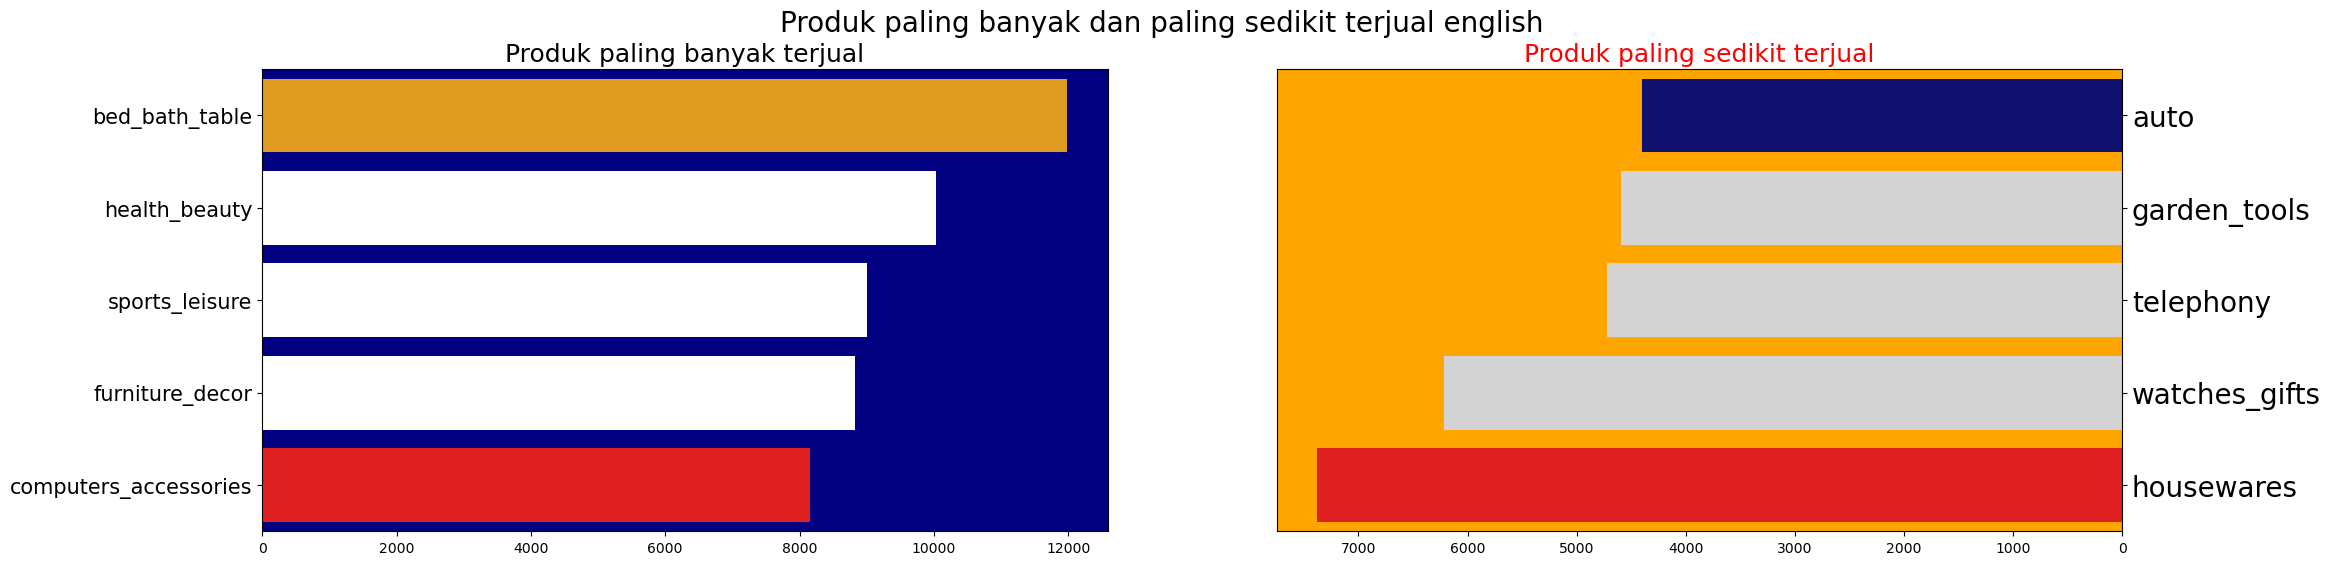

In [350]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["orange", "white", "white", "white", "red"]

sns.barplot(x="product_id", y="product_category_name_english", data=produk_terbanyak_dan_sedikit.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling banyak terjual", loc="center", fontsize=18,color = 'black')
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].set_facecolor('navy')


colors = ["navy", "#D3D3D3", "#D3D3D3", "#D3D3D3", "red"]

sns.barplot(x="product_id", y="product_category_name_english", data=produk_terbanyak_dan_sedikit.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling sedikit terjual", loc="center", fontsize=18,color = 'red')
ax[1].tick_params(axis='y', labelsize=20)
ax[1].set_facecolor('orange')


plt.suptitle("Produk paling banyak dan paling sedikit terjual english", fontsize=20)
plt.show()

dari data diatas bisa dilihat bahwa yang paling banyak terjual adalah bad_bath_table
dan yang paling sedikit terjual adalah auto

### 3.2.  Berapa rating yang diberikan pelanggan? Bisakah kamu tampilkan rating tertinggi hingga terendah? berapa mayoritas rating dari skala 1-5?


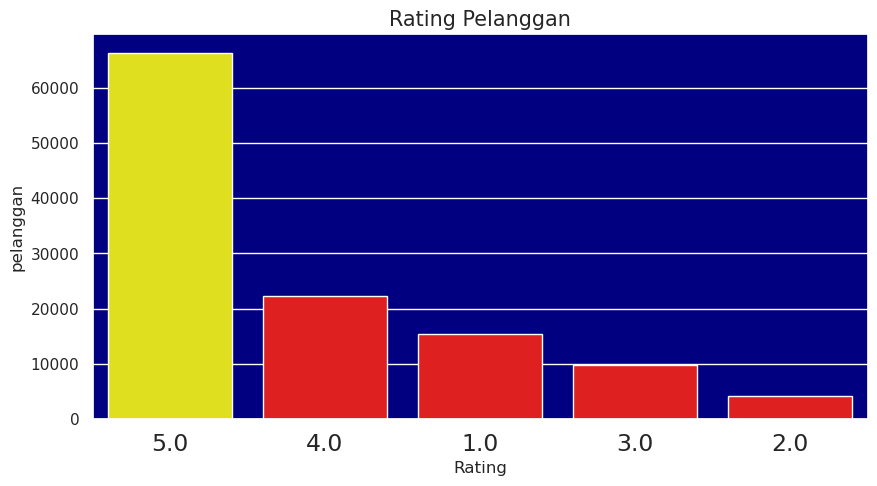

In [378]:
kepuasan_pelanggan = data_keseluruhan['review_score'].value_counts().sort_values(ascending=False)
rating_terbanyak = kepuasan_pelanggan.idxmax()
plt.figure(figsize=(10, 5))

sns.barplot(x=kepuasan_pelanggan.index, 
            y=kepuasan_pelanggan.values, 
            order=kepuasan_pelanggan.index,
            palette=["yellow" if score == rating_terbanyak 
                     else "red" for score in kepuasan_pelanggan.index])

plt.title("Rating Pelanggan", fontsize=15)
plt.xlabel("Rating")
plt.gca().set_facecolor('navy')
plt.ylabel("pelanggan")
plt.xticks(fontsize=17)

plt.show()

pada visualisasi diatas,dapat dilihat bahwa kepuasan pelanggan mayoritas memberi rating 5.0.
Tapi ternyata yang memberi rating 1.0 tidaklah angka terkecil,sehingga perlu meningkatkan kualitas pelayanan

### 3.3 Pertanyaan 3 : Jika di urutkan menurut kota di brazil,maka di kota mana pelanggan paling banyak memesan?

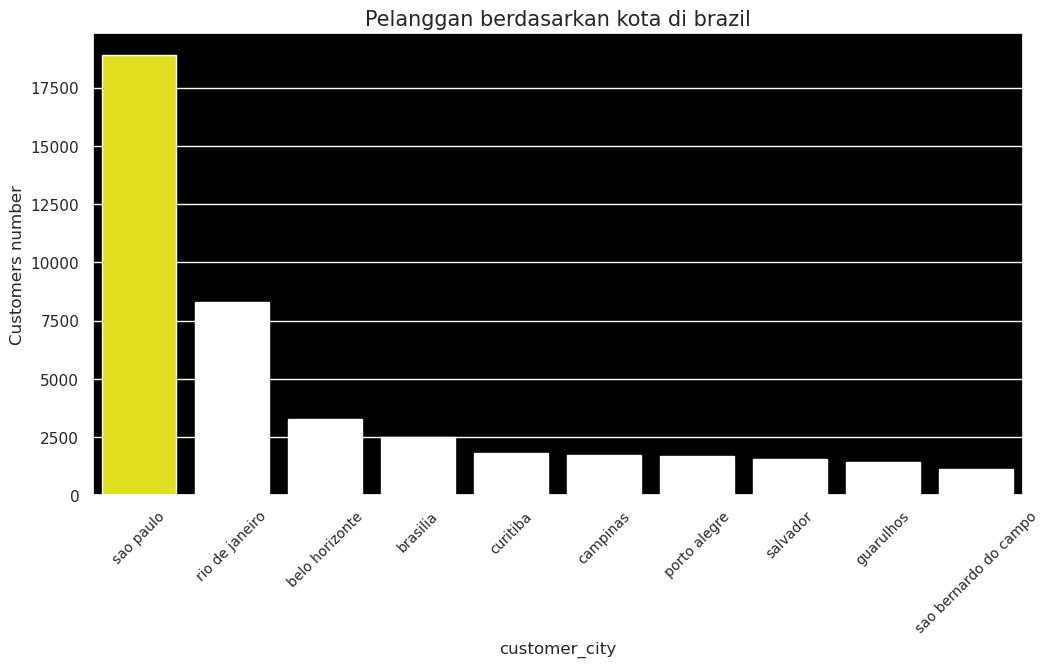

In [392]:
pelanggan_berdasarkan_kota = data_keseluruhan['customer_city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
kota_paling_banyak = pelanggan_berdasarkan_kota.idxmax()
pelanggan_berdasarkan_kota = pelanggan_berdasarkan_kota.sort_values(ascending=False)

sns.barplot(x=pelanggan_berdasarkan_kota.index, 
            y=pelanggan_berdasarkan_kota.values, 
            palette=["yellow" if city == kota_paling_banyak 
            else "white" for city in pelanggan_berdasarkan_kota.index])
            
plt.gca().set_facecolor('black')
plt.title("Pelanggan berdasarkan kota di brazil", fontsize=15)
plt.ylabel("Customers number")
plt.xticks(rotation=45, fontsize=10)
plt.show()

### pada visualisasi diatas,dapat disimpulkan bahwa kota terbanyak berada di sao paulo. Dan kota paling sedikit menggunakan adalah sao bernado do campo

In [398]:
output_csv_path = "/home/elfander/Proyek Ahir/proyek_ahir.csv"
data_keseluruhan.to_csv(output_csv_path, index=False)

# KESIMPULAN

## Pada data e-commerce ini,terdapat 3 pertanyaan bisnis yang di ajukan yaitu 


In [ ]:
1. Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?
yang paling banyak terjual adalah bad_bath_table dan yang paling sedikit terjual adalah auto

2. Berapa rating yang diberikan pelanggan? Bisakah kamu tampilkan rating tertinggi hingga terendah? berapa mayoritas rating dari skala 1-5
kepuasan pelanggan mayoritas memberi rating 5.0. Tapi ternyata yang memberi rating 1.0 tidaklah angka terkecil,sehingga perlu meningkatkan kualitas pelayanan

3. Jika di urutkan menurut kota di brazil,maka di kota mana pelanggan paling banyak memesan?
bahwa kota terbanyak berada di sao paulo. Dan kota paling sedikit menggunakan adalah sao bernado do campo
Sao paulo adalah kota besar. Kita bisa lihat juga bahwa di rio de janeiro juga banyak yang menggunakan e-commerce ini.
sehingga dapat disimpulkan E-commerce ini sudah populer.


## 1. Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?


### yang paling banyak terjual adalah bad_bath_table dan yang paling sedikit terjual adalah auto


## 2. Berapa rating yang diberikan pelanggan? Bisakah kamu tampilkan rating tertinggi hingga terendah? berapa mayoritas rating dari skala 1-5


### kepuasan pelanggan mayoritas memberi rating 5.0. Tapi ternyata yang memberi rating 1.0 tidaklah angka terkecil,sehingga perlu meningkatkan kualitas pelayanan


## 3. Jika di urutkan menurut kota di brazil,maka di kota mana pelanggan paling banyak memesan?


### bahwa kota terbanyak berada di sao paulo. Dan kota paling sedikit menggunakan adalah sao bernado do campo


### Sao paulo adalah kota besar. Kita bisa lihat juga bahwa di rio de janeiro juga banyak yang menggunakan e-commerce ini.


### sehingga dapat disimpulkan E-commerce ini sudah populer.